In [5]:
import tensorflow
from tensorflow import keras

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [7]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [8]:
X_train.shape

(60000, 28, 28)

In [15]:
X_train[0].shape

(28, 28)

In [17]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

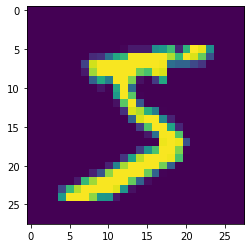

In [19]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [20]:
# convert data in 0 to 1 
X_train = X_train/255
X_test = X_test/255

In [22]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [67]:
# Build ANN network

model = Sequential()

#basically we have 28x28 shapes data, so need to convert into sequence, means conver 2D into 1D using Flattern layer

model.add(Flatten(input_shape =(28,28)))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))


In [68]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
# No need to do one hot encoding when we use "Sparse_categorical_crossentropy"

In [70]:
history = model.fit(X_train,y_train,epochs = 10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2828 - accuracy: 0.9154 - val_loss: 0.1509 - val_accuracy: 0.9555
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1153 - accuracy: 0.9651 - val_loss: 0.1217 - val_accuracy: 0.9614
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0797 - accuracy: 0.9755 - val_loss: 0.1017 - val_accuracy: 0.9713
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0625 - accuracy: 0.9804 - val_loss: 0.0900 - val_accuracy: 0.9736
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0500 - accuracy: 0.9840 - val_loss: 0.1222 - val_accuracy: 0.9650
Epoch 6/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0374 - accuracy: 0.9875 - val_loss: 0.1035 - val_accuracy: 0.9707
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0347 - accuracy: 0.9888 - val_loss: 0.1055 - val_accuracy:

In [71]:
y_pred=model.predict(X_test)

In [72]:
y_pred=y_pred.argmax(axis=1)

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
accuracy_score(y_test,y_pred)

0.9722

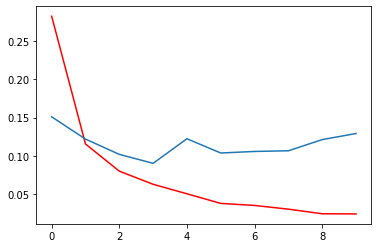

In [75]:
plt.plot(history.history['loss'],color='red')
plt.plot(history.history['val_loss'])

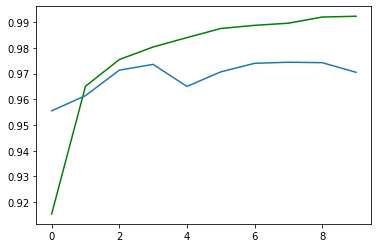

In [76]:
plt.plot(history.history['accuracy'],color='green',label = 'Acc')

plt.plot(history.history['val_accuracy'])


In [77]:
model.predict(X_test[5].reshape(1,28,28)).argmax(axis=1)

array([1])

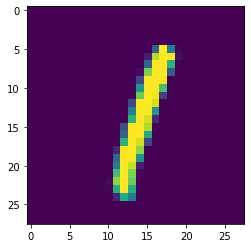

In [78]:
plt.imshow(X_test[5])